# Checkpoint Two: Exploratory Data Analysis

Now that your chosen dataset is approved, it is time to start working on your analysis. Use this notebook to perform your EDA and make notes where directed to as you work.

## Getting Started

Since we have not provided your dataset for you, you will need to load the necessary files in this repository. Make sure to include a link back to the original dataset here as well.

My dataset:

Your first task in EDA is to import necessary libraries and create a dataframe(s). Make note in the form of code comments of what your thought process is as you work on this setup task.

In [16]:
# Import Libraries
import pandas as pd
import numpy as np

# Dataframe Creation
df_gtd = pd.read_excel("gtd_2000-pres_domestic.xlsx")

<div class="alert alert-block alert-info">
<b>Analyst note:</b>

The codebook associated with the dataset may be found here: https://www.start.umd.edu/sites/default/files/2024-10/Codebook.pdf

Prior to this EDA, I pre-emptively removed columns from the original dataset in order to reduce the size of the .csv. This included limiting the timeframe from 2000 to 2020, excluding the 
data from 1970 to 1999. This early cleaning also included removing the columns with numerical values that also had corresponding text values (e.g. 'country'; 'country_txt') or those with 
interesting qualitative information but not useful in a quantitative analysis without further coding (e.g. 'summary'). Some of these fields were left to add additional context for future 
reviewers (e.g. source citations). Other fields, also with potentially valuable information but outside the scope of this project, were also removed, such as latitude/longitude.
</div>

## Get to Know the Numbers

Now that you have everything setup, put any code that you use to get to know the dataframe and its rows and columns better in the cell below. You can use whatever techniques you like, except for visualizations. You will put those in a separate section.

When working on your code, make sure to leave comments so that your mentors can understand your thought process.

In [ ]:
# In order to know the dataset and its columns and the data within them, viewing the top five entries:

df_gtd.head(6)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country_txt,region_txt,provstate,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,200001010004,2000,1,1,NaN,0,NaT,Kosovo,Eastern Europe,Kosovo,...,NaN,"“Kosovo: Romany Home Attacked, 1 Person Injure...",NaN,NaN,CETIS,-9,-9,1,1,NaN
1,200001010005,2000,1,1,NaN,0,NaT,Somalia,Sub-Saharan Africa,Banaadir,...,NaN,"“Somalia: 'Over 6' Killed in Mogadishu Attack,...",NaN,NaN,CETIS,-9,-9,0,-9,NaN
2,200001010006,2000,1,1,NaN,0,NaT,Bangladesh,South Asia,Chittagong,...,NaN,"“Bomb Blasts Disrupt Life in Chittagong,” The ...","“Bomb Blasts, Arson, Violence Mark Strike in C...",NaN,CETIS,-9,-9,0,-9,"200001010006, 200001010012, 200001010013, 2000..."
3,200001010007,2000,1,1,NaN,0,NaT,India,South Asia,Assam,...,NaN,“India: ULFA Militants Blow Up Oil Pipeline in...,NaN,NaN,CETIS,0,0,0,0,NaN
4,200001010008,2000,1,1,NaN,0,NaT,Kosovo,Eastern Europe,Kosovo,...,NaN,"“Serb Woman, Child Fired Upon by Unidentified ...",NaN,NaN,CETIS,-9,-9,1,1,NaN
5,200001010009,2000,1,1,NaN,0,NaT,Turkey,Middle East & North Africa,Istanbul,...,NaN,“Turkey: No Casualties in Bomb Attack on Istan...,NaN,NaN,CETIS,-9,-9,0,-9,NaN


In [ ]:
# Calculating the number of countries present within the dataset:
df_gtd['country_txt'].nunique(dropna=False)

169

In [ ]:
# Viewing the various countries within the dataset:
df_gtd['country_txt'].unique()

array(['Kosovo', 'Somalia', 'Bangladesh', 'India', 'Turkey', 'Spain',
       'United States', 'Sri Lanka', 'Germany', 'Algeria', 'Colombia',
       'Lebanon', 'Greece', 'Yemen', 'Armenia', 'Uganda', 'Nigeria',
       'Russia', 'Slovak Republic', 'United Kingdom', 'Italy', 'Sudan',
       'Iraq', 'Indonesia', 'Yugoslavia', 'Iran', 'Bosnia-Herzegovina',
       'Macedonia', 'Japan', 'South Africa', 'France', 'Nepal',
       'Mozambique', 'Switzerland', 'Thailand', 'Angola', 'Pakistan',
       'Israel', 'Philippines', 'Burundi', 'Ecuador', 'Paraguay',
       'Georgia', 'Peru', 'Afghanistan', 'Mexico', 'China', 'Tajikistan',
       'Senegal', 'Namibia', 'Belize', 'East Timor', 'Nicaragua',
       'West Bank and Gaza Strip', 'Azerbaijan', 'Brazil', 'Laos',
       'Haiti', 'Sierra Leone', 'Kenya', 'Tunisia', 'Canada', 'Rwanda',
       'Kyrgyzstan', 'Croatia', 'Netherlands', 'Latvia', 'Zimbabwe',
       'Malaysia', 'Guatemala', 'Fiji', 'Hong Kong', 'Cyprus',
       'Saudi Arabia', 'Gambia', 'E

In [14]:
# Identifying the column names:

df_gtd.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country_txt', 'region_txt', 'provstate',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=110)

In [ ]:
# To better understand the size of the dataset:

df_gtd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135275 entries, 0 to 135274
Columns: 110 entries, eventid to related
dtypes: datetime64[ns](1), float64(35), int64(21), object(53)
memory usage: 113.5+ MB


In [ ]:
# Nulls can affect analysis if trying to use one of those fields and no information is available. 
# While nulls may be useful in their own right in certain analyses, they are not inherently valuable.
# To understand what nulls may exist within the data:

df_gtd.isna().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    122851
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       113180
Length: 110, dtype: int64

In [23]:
# Due to the size of the current dataset, I believe it would be best to narrow the focus of
# my analysis. As such, I intend to limit the geographical range to the United States and United Kingdom.

df_gtd = df_gtd[df_gtd['country_txt'].isin(['United States', 'United Kingdom'])]

In [11]:
# Performing the same EDA again on the limited  dataset.

df_gtd.info()
df_gtd.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 1999 entries, 23 to 135212
Columns: 110 entries, eventid to related
dtypes: datetime64[ns](1), float64(35), int64(21), object(53)
memory usage: 1.7+ MB


eventid          0
iyear            0
imonth           0
iday             0
approxdate    1955
              ... 
INT_LOG          0
INT_IDEO         0
INT_MISC         0
INT_ANY          0
related       1650
Length: 110, dtype: int64

In [24]:
df_gtd.head(6)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country_txt,region_txt,provstate,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
23,200001010027,2000,1,1,NaN,0,NaT,United States,North America,Michigan,...,The four perpetrators were also indicted for t...,"""AG Hall Arsonist Sentenced to 21 Years in Pri...","Art Bukowski, ""Activists planned MSU arson plo...","Justice Department Documents and Publications,...",Eco Project 2010,0,1,0,1,NaN
34,200001030007,2000,1,3,NaN,0,NaT,United States,North America,California,...,NaN,"""Animal Liberation Front says they attack Cali...","FBI ""Terrorism in the United States 2000/2001""...",NaN,CETIS,0,1,0,1,NaN
35,200001030008,2000,1,3,NaN,0,NaT,United States,North America,Ohio,...,NaN,"""Abortion Clinics Evacuated After Threats of A...","Patricia Baird-Windle and Eleanor J. Bader, ""T...",NaN,Anti-Abortion Project 2010,-9,-9,0,-9,"200001030008, 200001030009"
36,200001030009,2000,1,3,NaN,0,NaT,United States,North America,Ohio,...,This is part of a multiple attack with 2000010...,"""Abortion Clinics Evacuated After Threats of A...","Patricia Baird-Windle and Eleanor J. Bader, ""T...",NaN,Anti-Abortion Project 2010,-9,-9,0,-9,"200001030008, 200001030009"
53,200001070003,2000,1,7,NaN,0,NaT,United Kingdom,Western Europe,Northern Ireland,...,"Denver Smith, 32, had been murdered at the sam...","“Blast in N. Ireland Town; None Injured,” Pres...",NaN,NaN,CETIS,-9,-9,1,1,NaN
68,200001100001,2000,1,10,NaN,0,NaT,United Kingdom,Western Europe,Northern Ireland,...,NaN,"David Sharrock, “Ulster Terrorist Leader Murde...","Chris Anderson, “Ulster Police Expect Loyalist...","Deric Henderson, “UK: LVF Blamed After Rival L...",CETIS,0,0,1,1,NaN


In [41]:
# Viewing various target types within the data:

df_gtd["targtype1_txt"].value_counts(dropna=False)

targtype1_txt
Private Citizens & Property       788
Religious Figures/Institutions    250
Business                          228
Police                            225
Unknown                           129
Government (General)              125
Educational Institution            43
Military                           37
Telecommunication                  37
Abortion Related                   35
Transportation                     30
Utilities                          12
Journalists & Media                12
Terrorists/Non-State Militia        9
Government (Diplomatic)             8
NGO                                 8
Airports & Aircraft                 8
Tourists                            7
Other                               6
Violent Political Party             2
Name: count, dtype: int64

In [42]:
# Viewing target type counts within the USA:

df_gtd[df_gtd["country_txt"] == "United States"]["targtype1_txt"].value_counts(dropna=False)

targtype1_txt
Private Citizens & Property       194
Religious Figures/Institutions    164
Business                          134
Government (General)               65
Police                             56
Abortion Related                   35
Educational Institution            32
Military                           18
Journalists & Media                 9
Utilities                           9
Airports & Aircraft                 7
Telecommunication                   7
Transportation                      6
NGO                                 4
Government (Diplomatic)             4
Unknown                             4
Terrorists/Non-State Militia        2
Tourists                            2
Other                               1
Name: count, dtype: int64

In [43]:
# Viewing target type counts within the UK:

df_gtd[df_gtd["country_txt"] == "United Kingdom"]["targtype1_txt"].value_counts(dropna=False)

targtype1_txt
Private Citizens & Property       594
Police                            169
Unknown                           125
Business                           94
Religious Figures/Institutions     86
Government (General)               60
Telecommunication                  30
Transportation                     24
Military                           19
Educational Institution            11
Terrorists/Non-State Militia        7
Tourists                            5
Other                               5
NGO                                 4
Government (Diplomatic)             4
Journalists & Media                 3
Utilities                           3
Violent Political Party             2
Airports & Aircraft                 1
Name: count, dtype: int64

In [44]:
# Viewing weapon type counts within the USA:

df_gtd[df_gtd["country_txt"] == "United States"]["weaptype1_txt"].value_counts(dropna=False)

weaptype1_txt
Incendiary                                                                     354
Firearms                                                                       175
Explosives                                                                     113
Melee                                                                           46
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)     25
Biological                                                                      20
Chemical                                                                        13
Sabotage Equipment                                                               4
Other                                                                            2
Fake Weapons                                                                     1
Name: count, dtype: int64

In [45]:
# Viewing weapon type counts within the UK: 

df_gtd[df_gtd["country_txt"] == "United Kingdom"]["weaptype1_txt"].value_counts(dropna=False)

weaptype1_txt
Explosives                                                                     588
Incendiary                                                                     427
Firearms                                                                       151
Melee                                                                           56
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      8
Unknown                                                                          8
Other                                                                            4
Chemical                                                                         2
Sabotage Equipment                                                               2
Name: count, dtype: int64

In [ ]:
# Observing relationship between weapon and target types

agg = df_gtd.groupby(['weaptype1_txt', 'targtype1_txt']).size().reset_index(name='event_count')
pivot = agg.pivot(index='weaptype1_txt', columns='targtype1_txt', values='event_count').fillna(0)

print(pivot.head())

targtype1_txt  Abortion Related  Airports & Aircraft  Business  \
weaptype1_txt                                                    
Biological                  0.0                  0.0       2.0   
Chemical                    0.0                  0.0       2.0   
Explosives                  5.0                  3.0      45.0   
Fake Weapons                0.0                  0.0       0.0   
Firearms                    3.0                  3.0      34.0   

targtype1_txt  Educational Institution  Government (Diplomatic)  \
weaptype1_txt                                                     
Biological                         1.0                      0.0   
Chemical                           1.0                      0.0   
Explosives                         9.0                      3.0   
Fake Weapons                       0.0                      0.0   
Firearms                           7.0                      2.0   

targtype1_txt  Government (General)  Journalists & Media  Military 

In [25]:
# Converting to .csv for continued use:

df_gtd.to_csv("gtd_uk_usa.csv", index=False)

## Visualize

Create any visualizations for your EDA here. Make note in the form of code comments of what your thought process is for your visualizations.

In [27]:
# Importing additional libraries for visualization purposes:

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator


df_gtd = df_gtd.dropna(subset=["iyear"]) # This is to ensure there are definitely no null values for 'iyear'.
df_gtd["iyear"] = df_gtd["iyear"].astype(int) # Converting to integer to ensure year is treated as such.




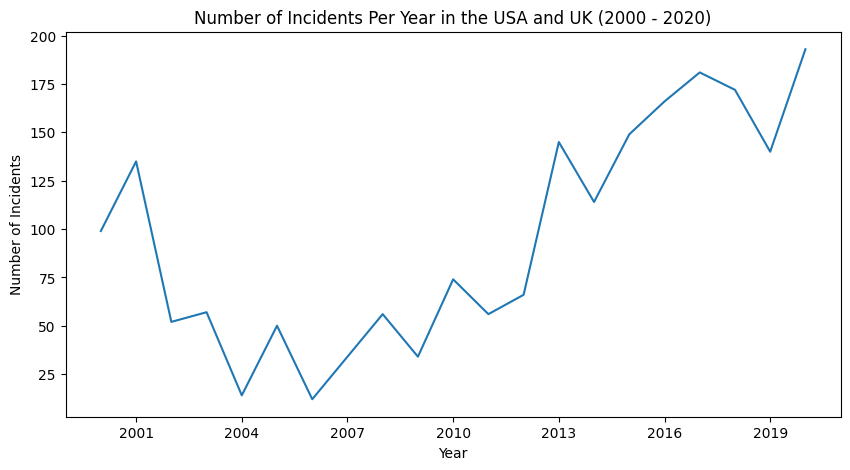

In [29]:
# Incidents Per Year
# The following is to visualize the total number of incidents over time, aggregated between the two countries.

incidents_per_year = df_gtd.groupby("iyear").size()

incidents_per_year.plot(kind="line", figsize=(10,5))

ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.title("Number of Incidents Per Year in the USA and UK (2000 - 2020)")
plt.xlabel("Year")
plt.ylabel("Number of Incidents")
plt.show()

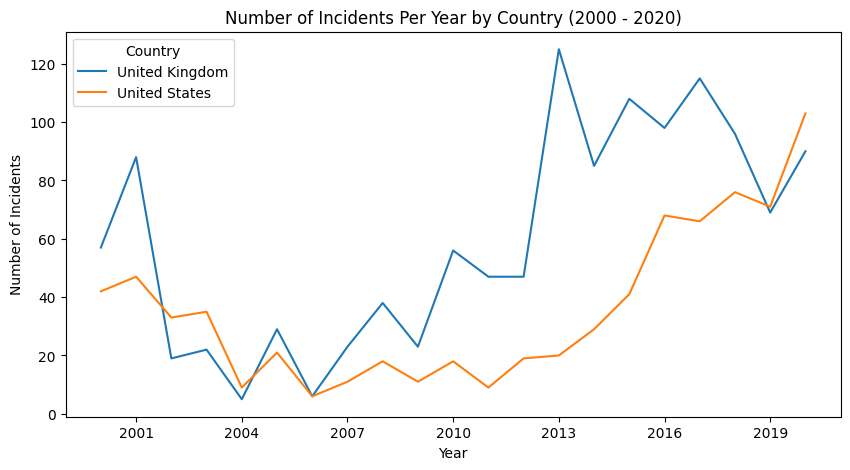

In [31]:
# Incidents per year by country
# The following is to visualize the same information as above but separated by country.

countries = ["United States", "United Kingdom"]

df_countries = df_gtd[df_gtd["country_txt"].isin(countries)]

incidents_country_year = (
    df_countries
    .groupby(["iyear", "country_txt"])
    .size()
    .unstack(fill_value=0)
)

incidents_country_year.plot(figsize=(10,5))

ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.title("Number of Incidents Per Year by Country (2000 - 2020)")
plt.xlabel("Year")
plt.ylabel("Number of Incidents")
plt.legend(title="Country")
plt.show()

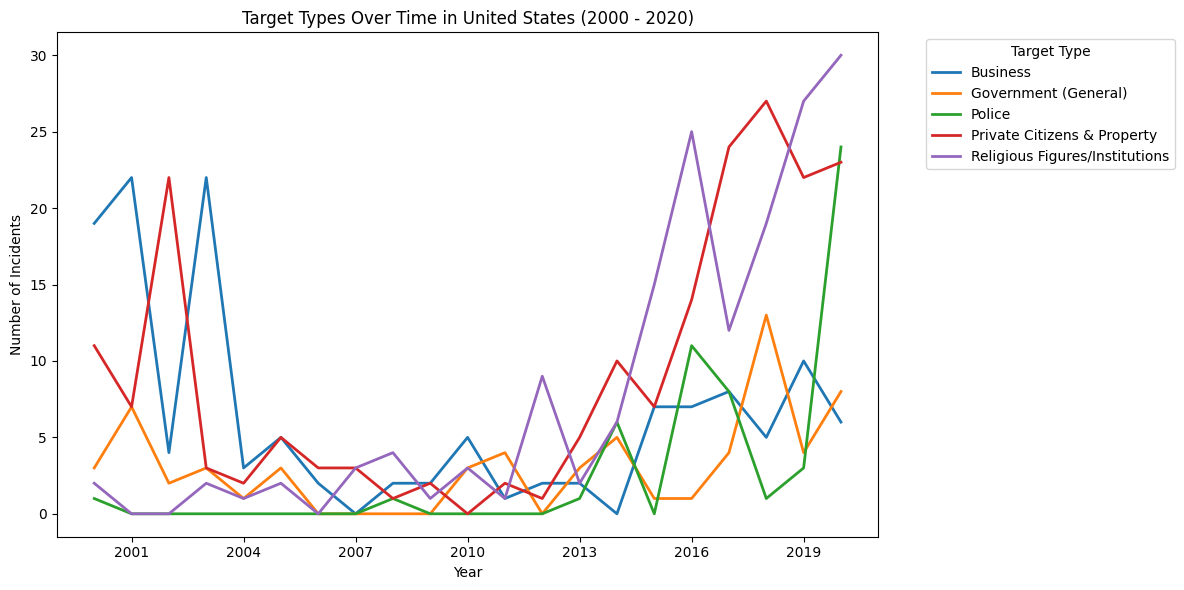

In [33]:
# Year, Target Type by Country
# The following visualization is to try to observe possible changes in target types over time in the USA.

# Setting the country to USA
country = "United States"
df_country = df_gtd[df_gtd["country_txt"] == country]

# Creating target-year for USA
target_year = (
    df_country
    .groupby(["iyear", "targtype1_txt"])
    .size()
    .unstack(fill_value=0)
)

# Capturing the top five target types; including all would be a jumble of lines.
top_targets = (
    df_country["targtype1_txt"]
    .value_counts()
    .head(5)
    .index
)

# Capturing target-year for top-targets for USA
target_year = (
    df_country[df_country["targtype1_txt"].isin(top_targets)]
    .groupby(["iyear", "targtype1_txt"])
    .size()
    .unstack(fill_value=0)
)
target_year.plot(
    kind="line",
    figsize=(12,6),
    linewidth=2
)

ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.title(f"Target Types Over Time in {country} (2000 - 2020)")
plt.xlabel("Year")
plt.ylabel("Number of Incidents")
plt.legend(title="Target Type", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

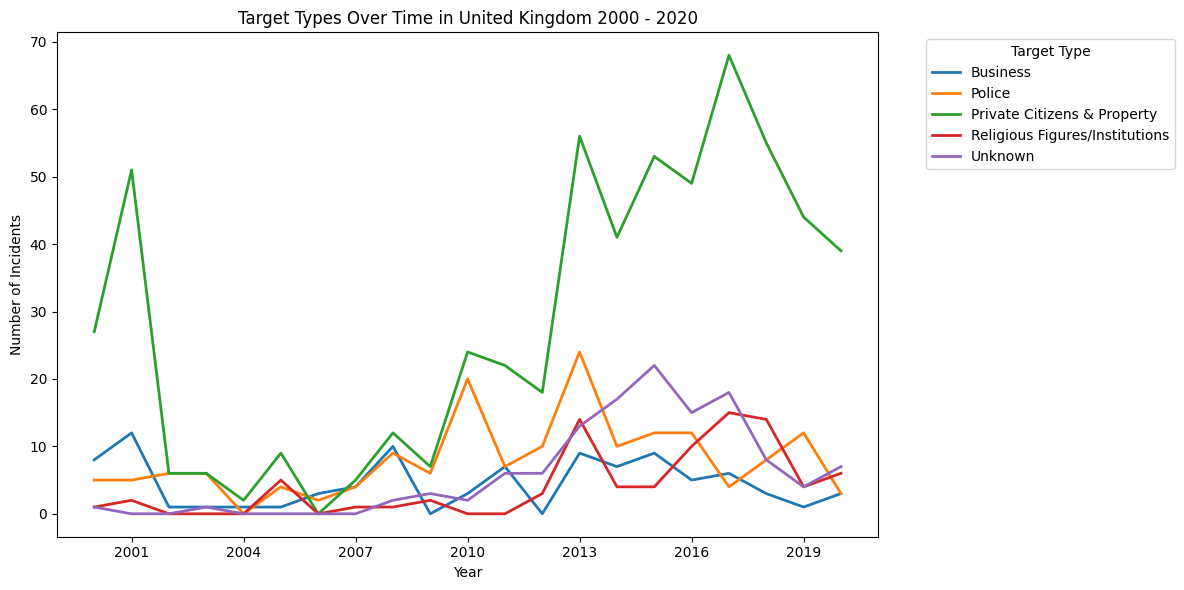

In [35]:
# Year, Target Type by Country
# Conducting the same as above but for the UK.

country = "United Kingdom"
df_country = df_gtd[df_gtd["country_txt"] == country]

target_year = (
    df_country
    .groupby(["iyear", "targtype1_txt"])
    .size()
    .unstack(fill_value=0)
)

top_targets = (
    df_country["targtype1_txt"]
    .value_counts()
    .head(5)
    .index
)

target_year = (
    df_country[df_country["targtype1_txt"].isin(top_targets)]
    .groupby(["iyear", "targtype1_txt"])
    .size()
    .unstack(fill_value=0)
)
target_year.plot(
    kind="line",
    figsize=(12,6),
    linewidth=2
)

ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.title(f"Target Types Over Time in {country} 2000 - 2020")
plt.xlabel("Year")
plt.ylabel("Number of Incidents")
plt.legend(title="Target Type", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
<b>Analyst note:</b>

I realized I was interested in also seeing any potential relationships between election changes and parties in power, hypothesizing a possible positive correlation between political swings and an increase in political violence. While calculating major election years for the USA can be reduced to every four years, I was also interested in UK elections and voteshare. As such, data was collected and collated into the dataset below from here: https://electionresults.parliament.uk/general-elections. 
</div>

In [39]:
# Dataframe Creation - Election Data UK

df_uk_elections = pd.read_csv("uk-gen_elections-voteshare-trunc.csv")

# Creating df for U.S. election years - presidential only

df_us_elections = [2000, 2004, 2008, 2012, 2016, 2020]

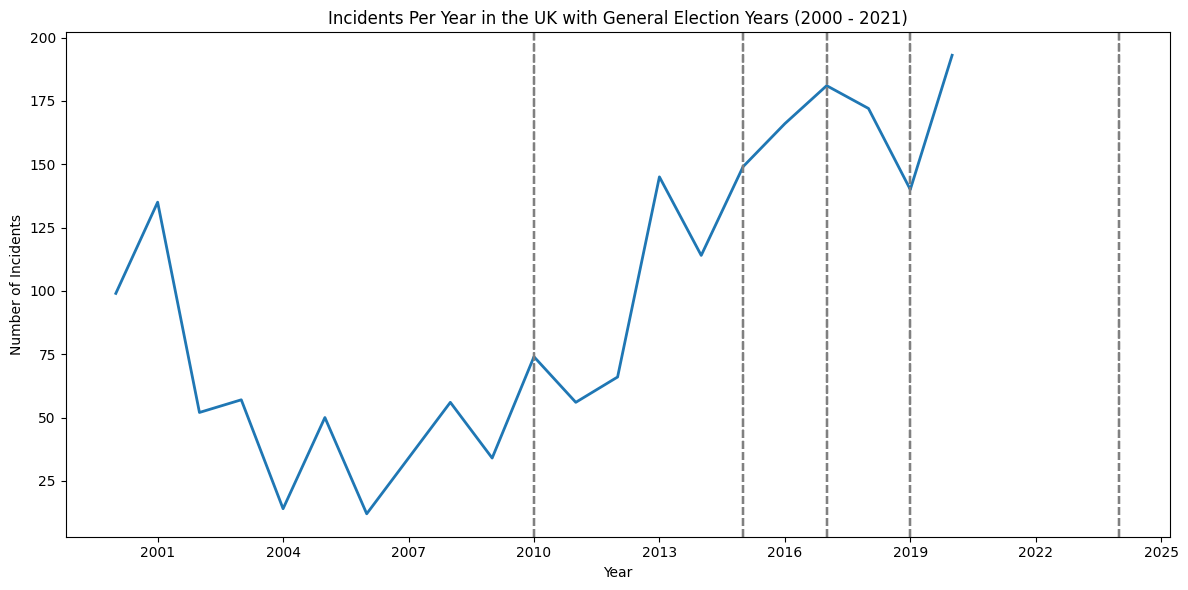

In [37]:
# Data was not available for the time span of the GTD dataset in use, so only those years during which it was available are marcate. The choice
# to keep the entire timeframe for the visualization was made because the longitudinal observations are still valuable.

# This visualization is to observe the number of incidents per year in the UK with those general election years notated.

fig, ax = plt.subplots(figsize=(12,6))

# Incidents
ax.plot(
    incidents_per_year.index,
    incidents_per_year.values,
    linewidth=2,
    label="Incidents per Year"
)

# Election year markers
for year in df_uk_elections["vote_year"]:
    ax.axvline(
        x=year,
        linestyle="--",
        alpha=0.4,
        color="gray"
    )

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_title("Incidents Per Year in the UK with General Election Years (2000 - 2021)")
ax.set_xlabel("Year")
ax.set_ylabel("Number of Incidents")

plt.tight_layout()
plt.show()

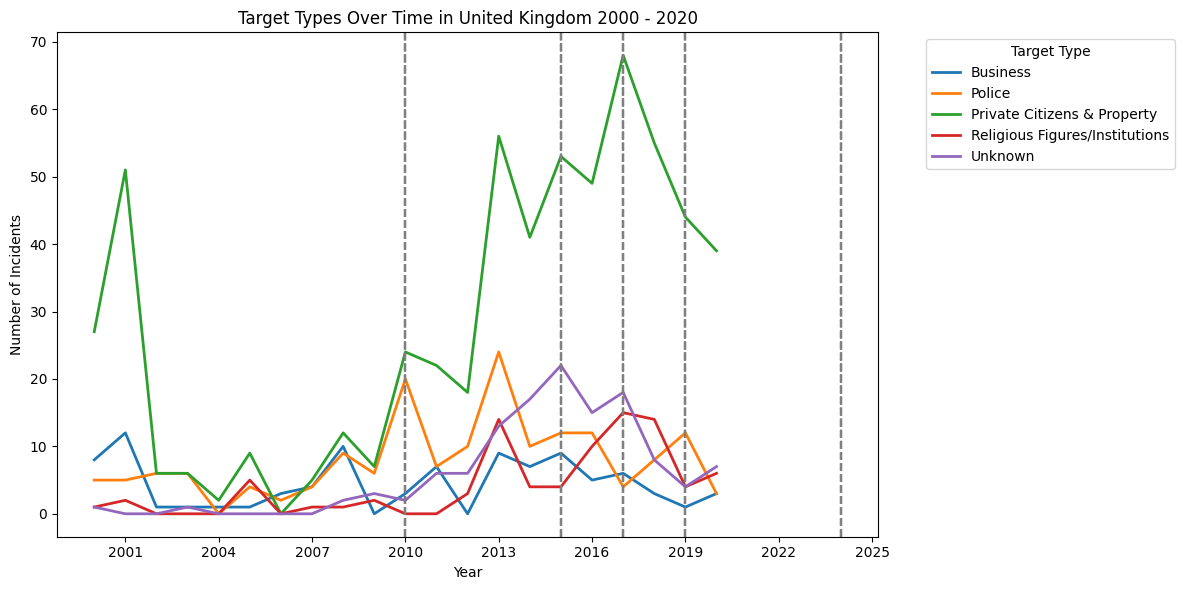

In [38]:
# Year, Target Type by Country
# This visualization builds off the target type visualization over time but with the general election years notated.

country = "United Kingdom"
df_country = df_gtd[df_gtd["country_txt"] == country]

target_year = (
    df_country
    .groupby(["iyear", "targtype1_txt"])
    .size()
    .unstack(fill_value=0)
)

top_targets = (
    df_country["targtype1_txt"]
    .value_counts()
    .head(5)
    .index
)

target_year = (
    df_country[df_country["targtype1_txt"].isin(top_targets)]
    .groupby(["iyear", "targtype1_txt"])
    .size()
    .unstack(fill_value=0)
)
target_year.plot(
    kind="line",
    figsize=(12,6),
    linewidth=2
)

ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

# Election year markers
for year in df_uk_elections["vote_year"]:
    ax.axvline(
        x=year,
        linestyle="--",
        alpha=0.4,
        color="gray"
    )
    
plt.title(f"Target Types Over Time in {country} 2000 - 2020")
plt.xlabel("Year")
plt.ylabel("Number of Incidents")
plt.legend(title="Target Type", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

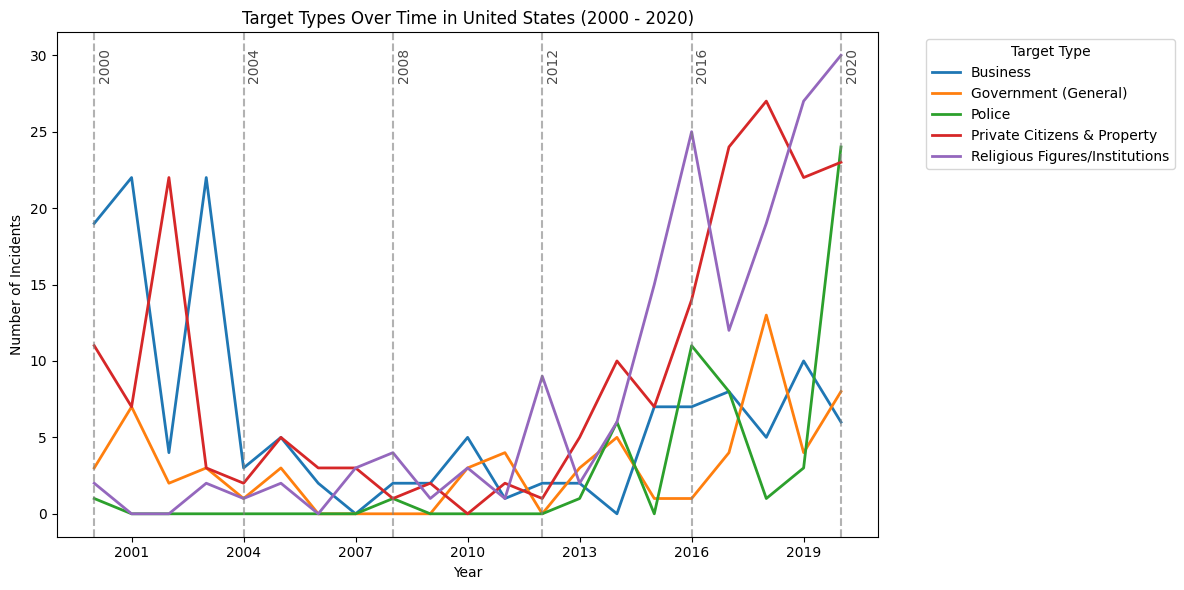

In [40]:
# Year, Target Type by Country
# This visualization builds off the target type visualization over time in the USA but with the presidential election years notated.

country = "United States"
df_country = df_gtd[df_gtd["country_txt"] == country]

target_year = (
    df_country
    .groupby(["iyear", "targtype1_txt"])
    .size()
    .unstack(fill_value=0)
)

top_targets = (
    df_country["targtype1_txt"]
    .value_counts()
    .head(5)
    .index
)

target_year = (
    df_country[df_country["targtype1_txt"].isin(top_targets)]
    .groupby(["iyear", "targtype1_txt"])
    .size()
    .unstack(fill_value=0)
)
target_year.plot(
    kind="line",
    figsize=(12,6),
    linewidth=2
)

ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

# Election year markers
for year in df_us_elections:
    ax.axvline(x=year, color='gray', linestyle='--', alpha=0.6)
    ax.text(year+0.1, ax.get_ylim()[1]*0.9, str(year), rotation=90, alpha=0.7)

plt.title(f"Target Types Over Time in {country} (2000 - 2020)")
plt.xlabel("Year")
plt.ylabel("Number of Incidents")
plt.legend(title="Target Type", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

## Summarize Your Results

With your EDA complete, answer the following questions.

1. Was there anything surprising about your dataset? 
<div class="alert alert-block alert-info">
I was reminded just how large the dataset is in its raw form. I also find it interesting the multiple ways in which the same information is coded, 
such as text values and numerical values corresponding to those (which require the codebook). I imagine this is due to possible modeling choices
dependent upon whomever is conducting the analysis.
</div>

2. Do you have any concerns about your dataset? 

<div class="alert alert-block alert-info">
I do not have specific concerns about the quality of the dataset. As an academic dataset maintained by an R1 university and used in a variety of settings
and analyses, it is robust and detailed. It is less of a concern for the dataset, but I would like to also include more recent (2021 - 2025) data possibly
in the future as anecdotally, there was an increase in political violence in during this time, as well as another major and contentious presidential election
in the United States.
</div>

3. Is there anything you want to make note of for the next phase of your analysis, which is cleaning data? 
<div class="alert alert-block alert-info">
There are null values that could be removed from the dataset and/or other columns that may be unnecessarily adding to the size of the file. There is nothing
specific otherwise of which I wish to make note for cleaning the data.
</div>